In [ ]:
# Cogs 118C
# HW4 (template)

# Student name:
# Student PID:

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Load the audio file
data = np.loadtxt('hw4_audio.csv',delimiter=',')
t = data[:,0]
x = data[:,1]
Fs = 44100 # Sampling rate in Hz

In [33]:
# (a) Save a .wav audio file. You should be able to download
# this file and play it to your speakers. How does it sound?
from scipy.io import wavfile
wavfile.write('hw4_audio.wav',Fs,x)

(638632, 2)


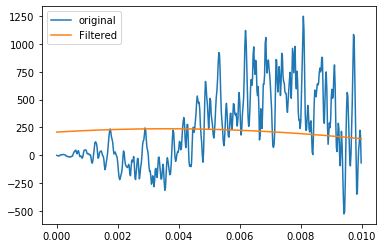

In [49]:
# (b) Make a plot showing the first 10 ms of the signal.
# Do you notice a strong sinusoidal oscillation? 
Fs, aud = wavfile.read('HW1_audio.wav')
print(aud.shape)
t1 = np.arange(0,10/1000,1/Fs)
plt.plot(t1,aud[:len(t1),0])
plt.plot(t1,y[:len(t1)])
plt.legend(['original','Filtered'])
# plt.plot(aud[:,0])

(-100, 100)

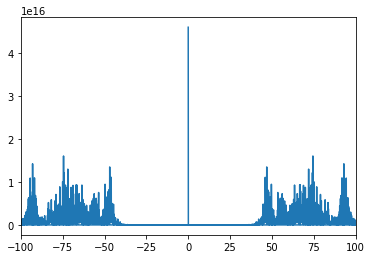

In [56]:
# (c) Plot the power spectrum of the signal. Use 
# log scale for the y-axis. Use plt.xlim() to zoom 
# in on the frequency range from 0 to 10 kHz. Finally,
# make sure to label the axes. 
#
# Hint: use np.fft.fft, np.fft.fftfreq
freq_bins = np.fft.fftfreq(aud.shape[0],1/Fs)
plt.plot(freq_bins,np.square(np.abs(np.fft.fft(aud[:,0]))))
lim = 100
plt.xlim([-lim,lim])

In [ ]:
# (d) What is the exact frequency of the largest peak
# in the power spectrum? Hint: You may need to zoom in even
# further on the plot you made in (c) to see exactly where
# the peak is.

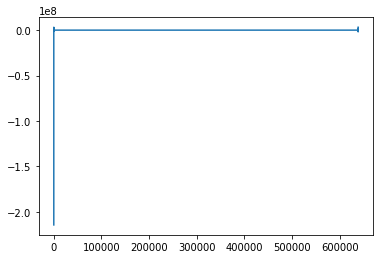

In [50]:
plt.plot(H*np.fft.fft(aud[:,0]))

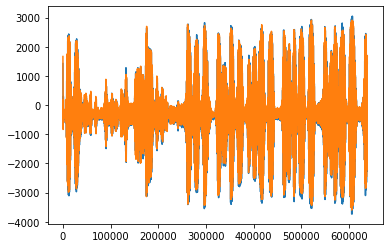

In [59]:
# (e) Ideal filter: Make a filter, H, that will remove frequencies
# f>3 kHz. Plot the product of H with X, the Fourier transform of x

# To get you started, here is how to create H:

H = np.abs(freq_bins)< 50
y = np.real(np.fft.ifft(H*np.fft.fft(aud[:,0])))
plt.plot(y)
y = np.real(np.fft.ifft(H*np.fft.fft(aud[:,1])))
plt.plot(y)
wavfile.write('hw1_audio_filtered.wav',Fs,y)

In [ ]:
# (f) Use the convolution theorem to calculate the filtered signal.
# To do this, note that the filtered signal is the inverse Fourier transform
# (ifft) of the product of the Fourier transforms of x and h.
# Save a .wav audio file containing the filtered signal. Download and listen to it. 
# Describe what you hear.

# Hint: use wavfile.write

Text(0, 0.5, 'Filter function h(n)')

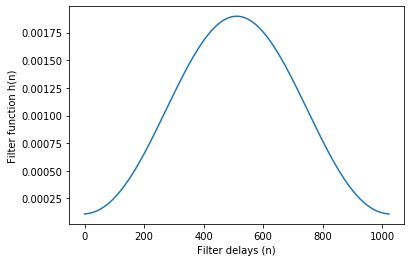

In [60]:
# Design a better high-pass filter using a finite impulse response (FIR)
# convolution. We will create a filter with order n=1024
from scipy import signal
n = 1024
h = signal.firwin(n,cutoff=20,fs=Fs) # This function designs a FIR filter
plt.plot(h)
plt.xlabel('Filter delays (n)')
plt.ylabel('Filter function h(n)')

In [ ]:
# (g) Apply the high-pass filter we designed to remove the high frequencies
# from the data. You may use np.convolve, with mode='same' so that the output
# has the same size as the input. Plot the power spectrum of the filtered signal, 
# again showing the range 0 to 10 kHz. Comment on the similarity and difference
# of this spectrum from the original spectrum (part c).


In [ ]:
# (h) Save the filtered signal as a .wav file and listen 
# to it on your speakers. What is the “secret” message 
# (actually a quote from the eminent UCSD neuro-philosopher
# Patricia Churchland)?
